# Week 2: Linear Regression

## Linear Regression with Bias

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 2.4 s, sys: 568 ms, total: 2.96 s
Wall time: 2.96 s


In [2]:
w = torch.tensor(-15.0, requires_grad=True)
w

tensor(-15., requires_grad=True)

In [3]:
b = torch.tensor(-10.0, requires_grad=True)
b

tensor(-10., requires_grad=True)

In [4]:
X = torch.arange(-3,3,0.1).view(-1,1)
X

tensor([[-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7.0000e-01],
        [-6.0000e-01],
        [-5.0000e-01],
        [-4.0000e-01],
        [-3.0000e-01],
        [-2.0000e-01],
        [-1.0000e-01],
        [-2.3842e-08],
        [ 1.0000e-01],
        [ 2.0000e-01],
        [ 3.0000e-01],
        [ 4.0000e-01],
        [ 5.0000e-01],
        [ 6.0000e-01],
        [ 7.0000e-01],
        [ 8.0000e-01],
        [ 9.0000e-01],
        [ 1.0000e+00],
        [ 1.1000e+00],
        [ 1.2000e+00],
        [ 1

In [5]:
f = 1*X-1
f

tensor([[-4.0000],
        [-3.9000],
        [-3.8000],
        [-3.7000],
        [-3.6000],
        [-3.5000],
        [-3.4000],
        [-3.3000],
        [-3.2000],
        [-3.1000],
        [-3.0000],
        [-2.9000],
        [-2.8000],
        [-2.7000],
        [-2.6000],
        [-2.5000],
        [-2.4000],
        [-2.3000],
        [-2.2000],
        [-2.1000],
        [-2.0000],
        [-1.9000],
        [-1.8000],
        [-1.7000],
        [-1.6000],
        [-1.5000],
        [-1.4000],
        [-1.3000],
        [-1.2000],
        [-1.1000],
        [-1.0000],
        [-0.9000],
        [-0.8000],
        [-0.7000],
        [-0.6000],
        [-0.5000],
        [-0.4000],
        [-0.3000],
        [-0.2000],
        [-0.1000],
        [ 0.0000],
        [ 0.1000],
        [ 0.2000],
        [ 0.3000],
        [ 0.4000],
        [ 0.5000],
        [ 0.6000],
        [ 0.7000],
        [ 0.8000],
        [ 0.9000],
        [ 1.0000],
        [ 1.1000],
        [ 1.

In [6]:
Y=f+0.1*torch.randn(X.size())
Y

tensor([[-4.1797],
        [-3.9424],
        [-3.6070],
        [-3.7576],
        [-3.5745],
        [-3.6674],
        [-3.4072],
        [-3.1572],
        [-3.1263],
        [-2.9678],
        [-3.0002],
        [-2.7910],
        [-2.9224],
        [-2.6386],
        [-2.5402],
        [-2.3711],
        [-2.5797],
        [-2.3754],
        [-2.3324],
        [-2.1078],
        [-1.9879],
        [-1.8871],
        [-1.9941],
        [-1.8586],
        [-1.6040],
        [-1.5082],
        [-1.2241],
        [-1.3965],
        [-1.2764],
        [-1.0596],
        [-1.0958],
        [-0.8447],
        [-0.6143],
        [-0.7164],
        [-0.5840],
        [-0.5912],
        [-0.3238],
        [-0.3177],
        [-0.2937],
        [-0.0887],
        [ 0.0333],
        [ 0.0551],
        [ 0.2133],
        [ 0.1739],
        [ 0.3814],
        [ 0.4028],
        [ 0.6906],
        [ 0.8753],
        [ 0.6484],
        [ 0.7532],
        [ 1.0617],
        [ 0.8961],
        [ 1.

In [7]:
def forward(x):
    return w * x + b

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [8]:
lr=0.1
cost = []
for epoch in range(4):
    yhat = forward(X)
    loss = criterion(yhat,Y)
    loss.backward()
    print(w.grad)
    w.data = w.data-lr*w.grad.data
    w.grad.data.zero_()

    b.data = b.data-lr*b.grad.data
    b.grad.data.zero_()

    cost.append(loss.item())

tensor(-95.1719)
tensor(-38.2009)
tensor(-15.4083)
tensor(-6.2745)


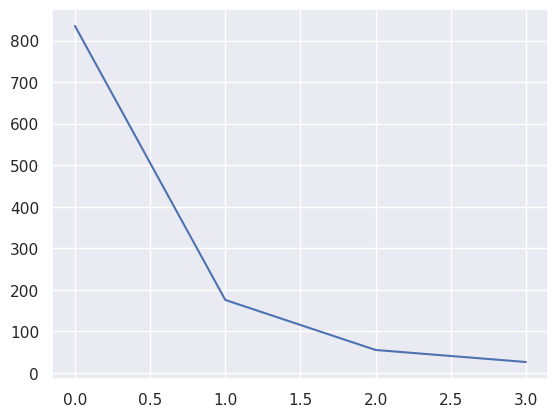

In [9]:
plt.plot(cost)
plt.show()